# 微積分（Calculus）

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

_Tested on SageMath version 8.7_

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 極限
當 $x$ 非常靠近一個數值的時候  
往往 $f(x)$ 也會非常靠近一個數值

想像你眼前有一根桿子（紅線）  
擋住一小部份的視線  
這時有一隻鳥從左邊往右邊飛過  
牠飛過桿子後方的時候被遮住了  
你猜得到牠在桿子後方時的高度嗎？

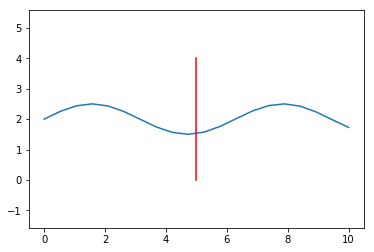

In [9]:
x = np.linspace(0,10,20)
y = 0.5 * np.sin(x) + 2
plt.axis('equal')
plt.plot(x,y)
plt.plot([5,5], [0,4], c='red')

如果 $f(x)$ 的函數值沒有亂跳  
在 $x$ 非常接近某一點 $x_0$ 的時候  
$f(x)$ 也會非常接近某一數數值  
這個數值我們稱之為當 $x$ 趨近到 $x_0$ 時 $f(x)$ 的**極限**  
記作 $\lim_{x\rightarrow x_0}f(x)$

比如說 $f(x) = x^2$  
則 $\lim_{x\rightarrow 3}f(x) = 9$

但在數學上  
我們並不在意 $f(x_0)$ 是多少  
也許它是一個很大的數字  
或是 $f(x_0)$ 沒有定義  
$\lim_{x\rightarrow x_0}f(x)$ 代表的是  
當 $x$ 很接近**但不等於** $x_0$ 的時候  
$f(x)$ 會接近的數

常見的例子是分數  
比如說 $f(x) = \frac{x^2（x-3)}{x-3}$  
因為分母不得為零，$f(3)$ 沒有定義  
但這並不影響極限的計算  
因為 $x\neq 3$  
$\lim_{x\rightarrow 3}\frac{x^2（x-3)}{x-3} = \lim_{x\rightarrow 3}x^2 = 9$

可以代入 $x_0$ 附近的數  
來求極限值的近似值

In [13]:
f = lambda x: x**2 * (x-3) / (x-3)
f(3.0001)
# f(3) 可以試試看 f(3) 會出錯，因為分母為零

9.00060001000000

要求出正確的極限值  
通常要經過代數運算  
而 Sage 的 `limit` 函數可以處理這件事

In [16]:
x = var('x') ### 將 x 設為一個變數
limit(x**2 * (x-3) / (x-3), x=3)

9

$\lim_{x\rightarrow 2}\frac{x^2 - x -2}{x-2} = 3$

In [21]:
limit( (x^2 - x - 2) / (x-2), x=2)

3

$\lim_{x\rightarrow 1}\frac{x^{10} - 1}{x - 1} = 10$

In [20]:
limit( (x^10 - 1) / (x-1), x=1)

10

在 Sage 裡可以用 `oo` 來代表無限大  
$\lim_{x\rightarrow\infty}\frac{1}{x} = 0$

In [22]:
limit( 1/x, x=oo)

0

**歐拉常數** $e$ 的其中一種定義方式為  
$e = \lim_{x\rightarrow\infty}\left(1+\frac{1}{x}\right)^x$

In [19]:
limit( (1+1/x)^x, x=oo)

e

## 微分
一個函數 $f(x)$ 在某一點 $x_0$ 的**微分**為  
$f(x)$ 在 $x_0$ 這點的切線斜率  
$f'(x_0) = \lim_{h\rightarrow 0}\frac{f(x_0+h) - f(x_0)}{h}$

![derivative](https://upload.wikimedia.org/wikipedia/commons/c/cc/Tangent_animation.gif "derivative")  
Source:  Brnbrnz / CC BY-SA (https://creativecommons.org/licenses/by-sa/4.0)

以 $f(x) = x^2$ 為例  
$f'(0) = 0$

In [1]:
x,h = var('x h')
f = x^2
x0 = 0
quo = (f.subs(x = x0+h) - f.subs(x = x0)) / h
print("quo =", quo)
limit(quo, h=0)

('quo =', h)


0

$f'(1) = 2$

In [28]:
x0 = 1
quo = (f.subs(x = x0+h) - f.subs(x = x0)) / h
print("quo =", quo)
limit(quo, h=0)

('quo =', ((h + 1)^2 - 1)/h)


2

另外一種計算方法  
是把 $x_0$ 當作一個未知數 $y$  
先計算完  
$f'(y) = \lim_{h\rightarrow 0}\frac{f(y+h) - f(y)}{h}$  
再代入 $y=x_0$

In [30]:
x,y,h = var('x y h')
f = x^2
quo = (f.subs(x = y+h) - f.subs(x = y)) / h
print("quo =", quo)
limit(quo, h=0)

('quo =', ((h + y)^2 - y^2)/h)


2*y

這裡算出來的 $f'(y)$ 被稱作 $f(x)$ 的**導函數**  
因為 $y$ 這個變數不一定要叫 $y$  
通常導函數會沿用原本的變數 $x$ 記作 $f'(x)$

例如 $f(x) = x^2$  
的導函數就是 $f'(x) = 2x$

In [31]:
x,h = var('x h')
f = x^2
quo = (f.subs(x = x+h) - f.subs(x = x)) / h
print("quo =", quo)
limit(quo, h=0)

('quo =', ((h + x)^2 - x^2)/h)


2*x

如此一來就可以快速地算出  
$f'(0) = 0$、$f'(1) = 2$

Sage 擅長代數運算  
當 `f` 是一個函數（`x` 的表示式）時  
可以用 `f.derivative()` 來計算 `f` 的導函數

In [2]:
f = x^2
f.derivative()

2*x

In [34]:
f = x^3
f.derivative()

3*x^2

In [35]:
f = x^3 + x^2
f.derivative()

3*x^2 + 2*x

In [36]:
f = sin(x)
f.derivative()

cos(x)

### 瞬時速度
若一個物體在數線上的位置  
隨著時間 $t$ 改變  
並且可以用 $f(t)$ 來表示  
則 $f'(t)$ 為物體在時間 $t$ 時的**瞬時速度**

比如說自由落體  
物體在時間 $t$ 時距離起始點的距離為 $f(t) = 4.9t^2$  

In [37]:
t = var('t')
f = 4.9 * t^2
fprime = f.derivative()

初始速度為 0

In [39]:
fprime.subs(t=0)

0.000000000000000

$t=1$ 時速度為，且速度隨時間增長

In [40]:
fprime.subs(t=1)

9.80000000000000

## 積分
積分在計算函數 $f(x)$ 底下的面積  

當 $h$ 很小的時候  
從 $x=x_0$ 到 $x=x_0+h$ 所蓋住 $f(x)$ 的面積  
大約是 $h\cdot f(x_0)$  

所以 $f(x)$ 介在 $x=a$ 和 $x=b$ 之間的面積  
可以寫為  
$\int_a^b f(x)\,dx = \lim_{n\rightarrow\infty}\sum_{k=1}^{n}f(a+kh)h$  
這裡 $h = \frac{b-a}{n}$

![integral](https://upload.wikimedia.org/wikipedia/commons/0/0a/Riemann_Integration_and_Darboux_Upper_Sums.gif "integral")  
Source:  IkamusumeFan / CC BY-SA (https://creativecommons.org/licenses/by-sa/3.0)

積分的計算更為繁瑣  
但依然可以用逼近的方法來求出近似值

比如說 $f(x) = x^2$  
$a=1$ 到 $b=3$

In [2]:
a,b = 1,3
f = lambda x: x**2

n = 20
h = (b-a) / float(n)
x = np.linspace(a,b,n+1)
area = f(x).sum() * h
print("area ~ %s"%area)

area ~ 9.17


比如說上半圓 $f(x) = \sqrt{1-x^2}$  
$a = -1$ 到 $b = 1$

In [3]:
a,b = -1,1
f = lambda x: np.sqrt(1-x**2)

n = 20
h = (b-a) / float(n)
x = np.linspace(a,b,n+1)
area = f(x).sum() * h
print("area ~ %s"%area)

area ~ 1.5522591631241591


然而確切的數值必須經過複雜的代數計算  
在 Sage 中  
如果 `f` 是一個 `x` 的表示式  
則 `f.integral(x, a, b)` 可以用來計算 $\int_a^b f(x)\,dx$

$f(x) = x^2$  
$\int_1^3 f(x)\,dx = \frac{26}{3} \sim 8.666\ldots$

In [56]:
x = var('x')
f = x^2
f.integral(x, 1, 3)

26/3

$f(x) = \sqrt{1-x^2}$  
$\int_{-1}^1 f(x)\,dx = \frac{\pi}{2} \sim 1.571\ldots$

In [60]:
x = var('x')
f = sqrt(1-x^2)
f.integral(x, -1, 1)

1/2*pi

一些特殊的幾何圖形可以直接計算  
其函數下的面積

比如說 $f(x) = x$  
從 $x=0$ 到 $x=3$  
所圍出來的是一個側邊長為 $3$ 的等腰三角形  
所以面積為 $\frac{1}{2}\cdot 3^2 = 4.5$

In [61]:
x = var('x')
f = x
f.integral(x, 0, 3)

9/2

## 動手試試看

###### 練習 1

試著運用函數 `limit`，  
求出 $\lim_{x\rightarrow 5} \frac{x^2 - 25}{x - 5}$

In [ ]:
### your answer here

###### 練習 2

試著運用函數 `limit`，  
求出 $\lim_{x\rightarrow 0} \frac{\sin(x)}{x}$

In [ ]:
### your answer here

###### 練習 3

試著運用函數 `limit`，  
求出函數 $\frac{|x|}{x}$ ，當x趨近於 `0` 時的__左極限__和**右極限**  
(提示：在`limit`函數中加入參數 `dir = '+'` 或 `dir = '-'` 即可改變逼近方向)

In [ ]:
### your answer here

##### 練習 4

試著運用 `derivative` 函數，  
計算 $f(x) = e^{2x}$ 的一次微分、二次微分、三次微分  
並觀察三者的結果

In [ ]:
### your answer here

##### 練習 5

試著用上面提及的用很多個長方形逼近曲線下面積的方法，  
估算 $x^2 + 5$ 在 `x = 1` 到 `x = 4` 曲線下的面積  

In [ ]:
### your answer here

##### 練習 6

試著運用 `integral()` 函數，  
計算 $f(x) = x^2 + 5$ 從 `x = 1` 到 `x = 2` 的積分

In [ ]:
### your answer here

##### 練習 7

試著運用 `integral()` 函數，  
計算 `f(x) = 1/x` 從 `x = 1` 到 `x = 2` 的積分

In [ ]:
### your answer here

##### 練習 8

承上題，函數 $f(x) = 1/x$ 可以在 [`0` 到 `任一正整數`] 之間做用`integral()` 函數做積分嗎？  
若不能的話想想看為什麼？

In [ ]:
### your answer here

##### 練習 9

已知一點從原點出發、以`x > 0`為正，做一維的直線運動，且已知它的速度對時間的函數  
$v(t) = 3t^2 + 5t$   
定義一個函數 `position(t)` 其功能為：  
傳入當前的時間 `t` 並回傳該點當下的座標

In [ ]:
### your answer here

##### 練習 10

承上題，  
定義一個函數 `acceleration(t)` 其功能為：  
傳入當前的時間 `t` 並回傳該點當下的加速度

In [ ]:
### your answer here